In [1]:
import pandas as pd
pd.__version__

'1.5.3'

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [11]:
import seaborn as sns
sns.__version__

'0.12.2'

In [28]:
data = pd.read_csv("traffic stops.csv")

In [29]:
data.head(5)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [30]:
data.shape

(91741, 15)

In [31]:
data.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [44]:
data.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64


#  Remove the column that only contains missing values

drop : Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names. axis=1 means, **columns** should drop. With setting inplace=True, we make this change permanent.

In [33]:
data.drop('county_name', axis=1, inplace=True) 

In [34]:
# checking the new shape
data.shape

(91741, 14)

In [35]:
data.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

# Do men or women speed more often? 

In [45]:
data[data.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [38]:
# alternative way to do the same
data.loc[data.violation == 'Speeding', 'driver_gender'].value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

Men are more stopped by the police due to speeding than women

In [39]:
data.groupby('driver_gender').violation.count()

driver_gender
F    23511
M    62895
Name: violation, dtype: int64

In [40]:
# When a  man pulled over, how often is it for speeding

data[data.driver_gender == 'M'].violation.value_counts()

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64

In [46]:
# For women

data[data.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [42]:
# Violation data of both

data.groupby('driver_gender').violation.value_counts()

driver_gender  violation          
F              Speeding               15482
               Moving violation        3204
               Equipment               2487
               Registration/plates     1013
               Other                    690
               Seat belt                635
M              Speeding               32979
               Moving violation       13020
               Equipment               8533
               Other                   3627
               Registration/plates     2419
               Seat belt               2317
Name: violation, dtype: int64

# Does a gender affect who gets searched during stop?

In [43]:
data.groupby('driver_gender').search_conducted.value_counts()

driver_gender  search_conducted
F              False               23040
               True                  471
M              False               60170
               True                 2725
Name: search_conducted, dtype: int64

In [48]:
# Ignore gender

data.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [49]:
data.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [52]:
# with second factor

data.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

# Why is search_type missing often ?



In [53]:
data.isna().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [54]:
data.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [60]:
# why is the series empty ?
data[data.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [58]:
# value_counts ignores missing values by default
data[data.search_conducted == False].search_type.value_counts(dropna=False)


NaN    88545
Name: search_type, dtype: int64

In [59]:
data.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Protective

In [62]:
# when search_conducted is True search_type is never missing

data[data.search_conducted == True].search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

isnull is the same with insa

# During a search, how often driver frisked?

In [65]:
data.search_type.str.contains('Protective Frisk')

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
91736    NaN
91737    NaN
91738    NaN
91739    NaN
91740    NaN
Name: search_type, Length: 91741, dtype: object

In [66]:
data['frisk'] = data.search_type.str.contains('Protective Frisk')  # new column

In [74]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [75]:
data.frisk.dtype

dtype('O')

In [73]:
data.frisk.sum()

274

In [68]:
data.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [71]:
data.frisk.mean()

0.08573216520650813

# Which year had the least no. of stops ?

In [76]:
combined = data.stop_date.str.cat(data.stop_time, sep='  ')

In [77]:
data['stop_datetime'] = pd.to_datetime(combined)

In [83]:
data.stop_datetime.dt.year.value_counts().index[10]

2005

# How does drug activity change by time of day?
### stop_datetime, drug_related_stop(column)

<Axes: xlabel='stop_datetime'>

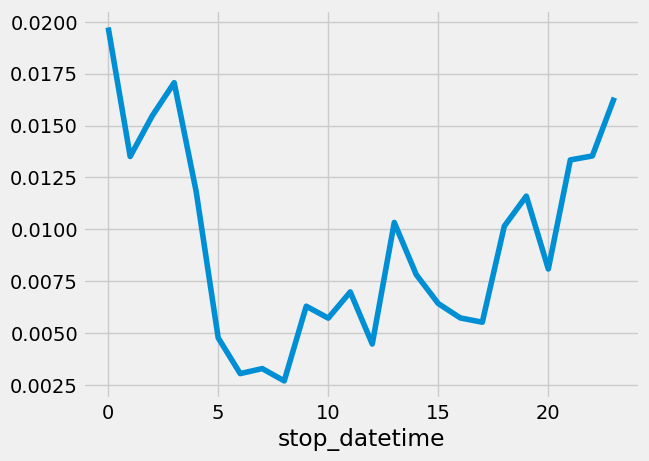

In [85]:
data.groupby(data.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

# Do most stops occur at night?

In [86]:
data.stop_datetime.dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

<Axes: >

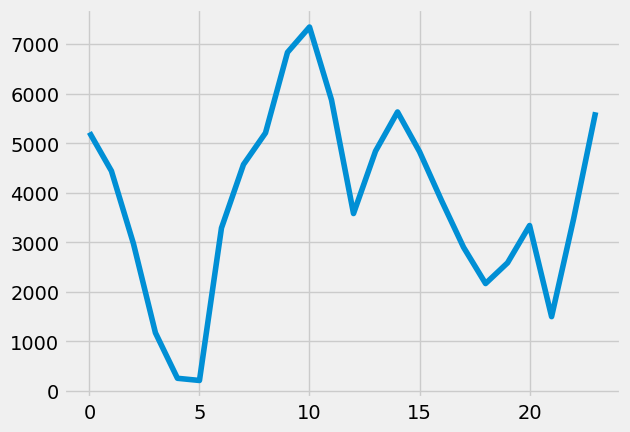

In [88]:
data.stop_datetime.dt.hour.value_counts().sort_index().plot()